In [1]:
# loading packages 
import datacube 
import matplotlib.pyplot as plt
from deafrica_tools.dask import create_local_dask_cluster
from deafrica_tools.plotting import rgb, display_map

In [2]:
# connecting to the datacube 
dc = datacube.Datacube(app='Step3')

In [3]:
# create dask cluster
create_local_dask_cluster()

Client Scheduler: tcp://127.0.0.1:38431 Dashboard: /user/mseehaber@frontiersi.com.au/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 28.14 GB


In [4]:
# lazy loading data through dask chunks parameter
lazy_data = dc.load(product='gm_s2_semiannual',
                   measurements=['blue','green','red','nir'],
                   x=(30.1505, 30.4504),
                   y=(30.0899, 30.3898),
                   time=('2020-01-01', '2021-12-31'),
                   dask_chunks={'time':1,'x':1500, 'y':1700})
# return data
lazy_data

<xarray.Dataset>
Dimensions:      (time: 4, y: 3317, x: 2895)
Coordinates:
  * time         (time) datetime64[ns] 2020-03-31T23:59:59.999999 ... 2021-09...
  * y            (y) float64 3.702e+06 3.702e+06 ... 3.669e+06 3.669e+06
  * x            (x) float64 2.909e+06 2.909e+06 ... 2.938e+06 2.938e+06
    spatial_ref  int32 6933
Data variables:
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [5]:
# calcualte NDVI using red and nir bands from array
band_diff = lazy_data.nir - lazy_data.red
band_sum = lazy_data.nir + lazy_data.red

# added ndvi dask array to the lazy_data dataset
lazy_data['ndvi'] = band_diff/ band_sum

# return the dataset 
lazy_data

<xarray.Dataset>
Dimensions:      (time: 4, y: 3317, x: 2895)
Coordinates:
  * time         (time) datetime64[ns] 2020-03-31T23:59:59.999999 ... 2021-09...
  * y            (y) float64 3.702e+06 3.702e+06 ... 3.669e+06 3.669e+06
  * x            (x) float64 2.909e+06 2.909e+06 ... 2.938e+06 2.938e+06
    spatial_ref  int32 6933
Data variables:
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
    ndvi         (time, y, x) float64 dask.array<chunksize=(1, 1700, 1500), meta=np.ndarray>
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

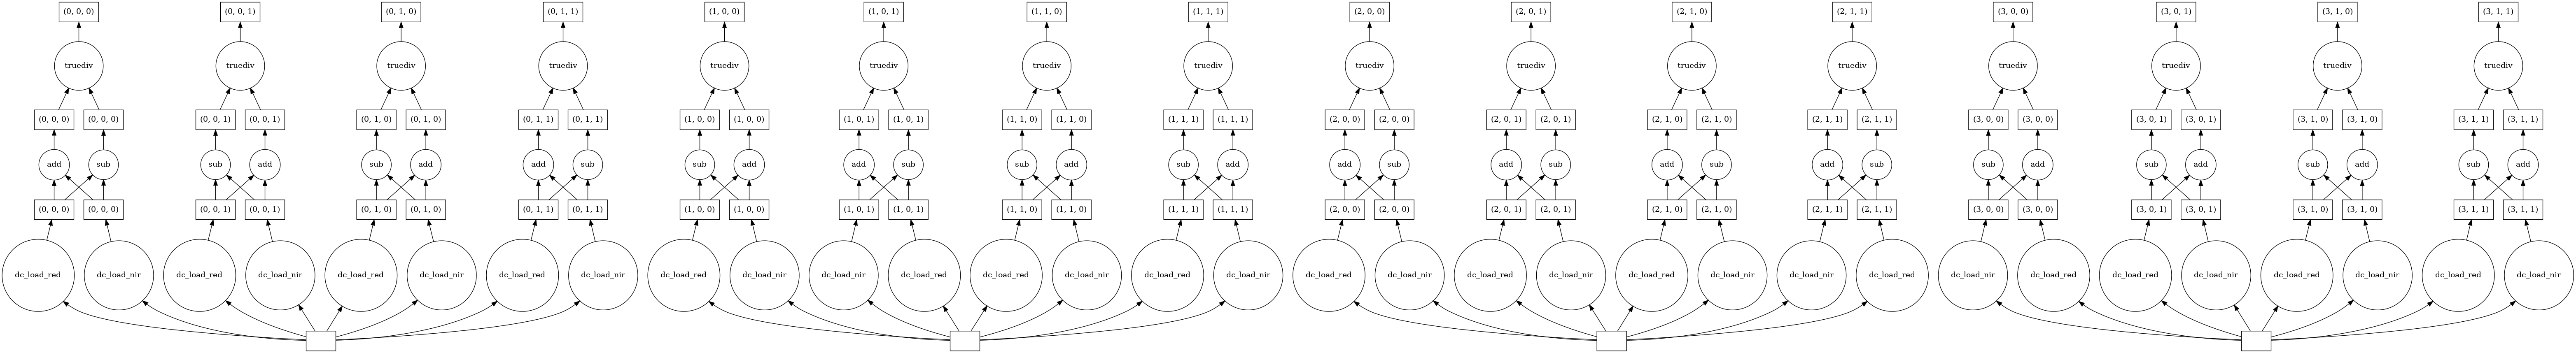

In [6]:
lazy_data.ndvi.data.visualize()

In [7]:
lazy_data_ndvi_compute = lazy_data.ndvi.compute()
lazy_data_ndvi_compute

<xarray.DataArray 'ndvi' (time: 4, y: 3317, x: 2895)>
array([[[0.06942078, 0.07080692, 0.0696223 , ..., 0.08328466,
         0.08114312, 0.08132118],
        [0.06951645, 0.0696682 , 0.06692324, ..., 0.08635357,
         0.0831899 , 0.07955576],
        [0.06737811, 0.06848731, 0.06940029, ..., 0.08616674,
         0.08235834, 0.07685342],
        ...,
        [0.38583474, 0.43568613, 0.4921664 , ..., 0.1825495 ,
         0.18272629, 0.18238801],
        [0.30237789, 0.37975794, 0.45614666, ..., 0.18378126,
         0.18577805, 0.18638376],
        [0.20758178, 0.28623428, 0.39149965, ..., 0.17947142,
         0.18378543, 0.18722567]],

       [[0.06175587, 0.06195676, 0.0608138 , ..., 0.07257672,
         0.07069745, 0.07147104],
        [0.06372657, 0.06219042, 0.05804492, ..., 0.07568556,
         0.07152239, 0.06959707],
        [0.06023316, 0.05772772, 0.05621204, ..., 0.07639401,
         0.07051051, 0.06657224],
...
        [0.50187138, 0.51266042, 0.54626763, ..., 0.09506223,
         0.09237813, 0.09149278],
        [0.3803492 , 0.46448664, 0.5345694 , ..., 0.09328612,
         0.09230149, 0.09234264],
        [0.2332595 , 0.35116818, 0.48972061, ..., 0.09416427,
         0.09450847, 0.0938633 ]],

       [[0.06011664, 0.06107649, 0.05899572, ..., 0.06922051,
         0.06808663, 0.06809524],
        [0.06101091, 0.06024636, 0.05826772, ..., 0.07232165,
         0.0690321 , 0.06698507],
        [0.05838208, 0.05756208, 0.06089405, ..., 0.07196642,
         0.06814041, 0.06525912],
        ...,
        [0.07636253, 0.07974138, 0.08053382, ..., 0.08965897,
         0.0869683 , 0.0873734 ],
        [0.07742436, 0.07760673, 0.07651878, ..., 0.08991228,
         0.08896701, 0.08775236],
        [0.07300672, 0.07317073, 0.07252679, ..., 0.09073517,
         0.09058855, 0.08816799]]])
Coordinates:
  * time         (time) datetime64[ns] 2020-03-31T23:59:59.999999 ... 2021-09...
  * y            (y) float64 3.702e+06 3.702e+06 ... 3.669e+06 3.669e+06
  * x            (x) float64 2.909e+06 2.909e+06 ... 2.938e+06 2.938e+06
    spatial_ref  int32 6933

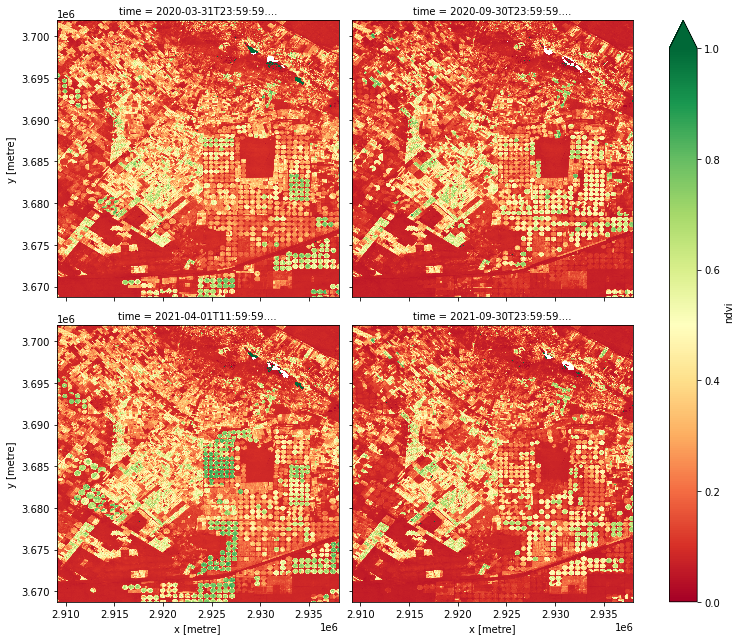

In [8]:
#plotting the timesteps
lazy_data_ndvi_compute.plot(col='time', col_wrap= 2, cmap='RdYlGn',figsize=(11, 9),vmin=0, vmax=1)